<a href="https://colab.research.google.com/github/safranco8/Mentoria2022-G2/blob/main/20220525_TP1_analisis_y_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas de una Cadena de Supermercados

# Trabajo Práctico N°1: Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación a los datos bajo análisis. 
En este [link](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data), se describen los contenidos de cada uno de los archivos.
La información central se encuentra en el archivo *train.csv* porque que el mismo contiene las series históricas con las ventas de cada sucursal para cada familia de productos.
Entonces, en primer lugar se cargan y presentan brevemente los datos del archivo *train.csv* y luego se proponen las consignas a seguir para la resolución del trabajo práctico. 




### Carga del dataset

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import scipy.stats
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

In [141]:
from numpy.ma.core import sort
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df_full = pd.read_csv(url)
df_full.head(3)



,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


La variable de interés es *sales*. Si bien se podría trabajar con series desagregadas por sucursal y producto, se procede a agregar los datos a nivel de sucursales para reducir la carga computacional.

In [142]:
df = df_full.copy()
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr', 'date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

In [143]:
df

store_nbr,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


Guardado del dataset

In [144]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [145]:
df2 = pd.read_excel('dataset.xlsx',index_col=0, parse_dates=True)

In [146]:
df2

,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análisis exploratorio profundo de las series.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los datos analizados que sirva de base para, en practicos posteriores, modelar las series y hacer pronósticos.

Dado que se trata de muchas series, se puede limitar el análisis a un subconjuto de las mismas, por ejemplo seleccionando las 5-10 sucursales con más ventas. 

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

Se proponen las siguientes actividades motivadoras:


- Determinar el tipo de variables y el período de tiempo bajo análisis.

- Explorar si hay valores faltantes.

- Indagar sobre la existencia de ceros. ¿Hay valores nulos? ¿Son muchos? ¿En qué días ocurren? 

- Analizar las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza, coeficiente de variación, coeficientes de asimetría y kurtosis).

- ¿Se mantienen inalteradas en el tiempo las distribuciones? En este caso se podría seleccionar una serie (o el total)  y graficar un boxplot para cada año.

- ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos? (Tener en cuenta las características de la estacionalidad)

- Explorar la existencia de estacionalidad.

- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse?  

- ¿Las series tienden a moverse en forma conjunta? ¿Siempre se da dicho patrón?

- Seleccionar una serie y confeccionar un diagrama de dispersión entre la misma y su valor retardado un período. Repetir el mismo procedimiento entre la serie y sus valores retardados 2, 3 y 4 períodos.
 
- Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación.


## Fecha de entrega

- __Version final: 20/05__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


###Determinar el tipo de variables y el período de tiempo bajo análisis. Explorar si hay valores faltantes.


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store 1   1684 non-null   float64
 1   Store 2   1684 non-null   float64
 2   Store 3   1684 non-null   float64
 3   Store 4   1684 non-null   float64
 4   Store 5   1684 non-null   float64
 5   Store 6   1684 non-null   float64
 6   Store 7   1684 non-null   float64
 7   Store 8   1684 non-null   float64
 8   Store 9   1684 non-null   float64
 9   Store 10  1684 non-null   float64
 10  Store 11  1684 non-null   float64
 11  Store 12  1684 non-null   float64
 12  Store 13  1684 non-null   float64
 13  Store 14  1684 non-null   float64
 14  Store 15  1684 non-null   float64
 15  Store 16  1684 non-null   float64
 16  Store 17  1684 non-null   float64
 17  Store 18  1684 non-null   float64
 18  Store 19  1684 non-null   float64
 19  Store 20  1684 non-null   float64
 20  Store 21  1684 non-n

En cuanto al período tenemos datos desde Enero de 2013 a Agosto 2017

Tipo de datos: Todas las columnas son de tipo float64, que hacen referencia a cantidad/kgs vendidos en el día para cada sucursal.

Podemos observar que no hay valores nulos en las columnas referentes a las ventas.

###Indagar sobre la existencia de ceros. ¿Hay valores nulos? ¿Son muchos? ¿En qué días ocurren?


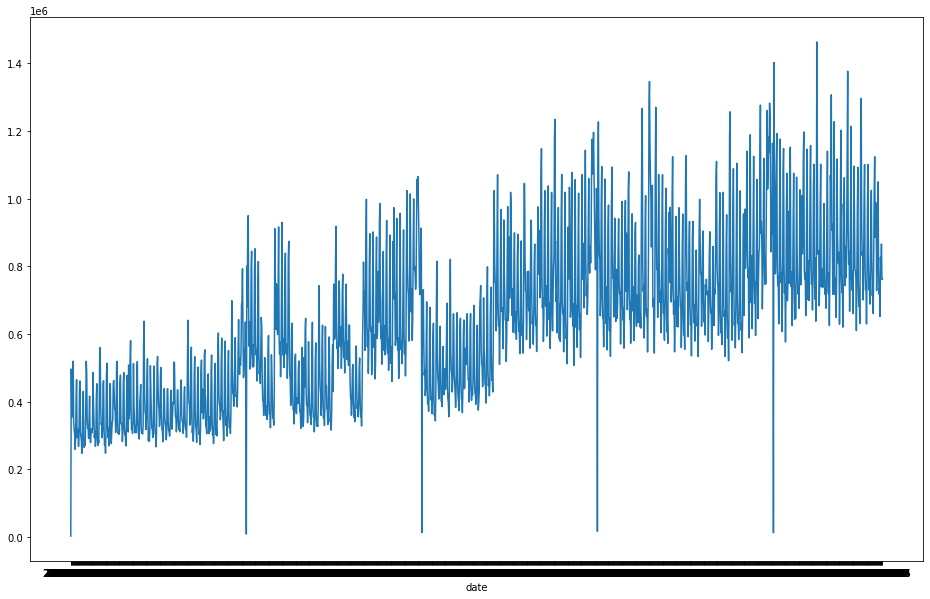

In [148]:
# VENTAS TOTALES POR DÍAS
fig = plt.figure(figsize=(16,10))
df_sum_filas = df.sum(axis=1)
sns.lineplot(data=df_sum_filas)
plt.show()

Del grafico se puede apreciar que los registros con valor cero a nivel agregado se presentan una sola vez en el año (todas las tiendas cierran el 1 de enero de cada año)

También se observa como se van incrementando las ventas a lo largo del tiempo, 
al tratarse de unidades vendidas no se trata de un efecto inflacionario sino de mayores ventas. Más adelante tambien podremos observar que la apertura de nuevas sucursales puede que influya en el incremento de las ventas.

Existen picos de ventas o outliers que trataremos mas adelante.

In [149]:
count_zeros = df[df == 0].count(axis=0).sort_values(ascending = False)
count_zeros

store_nbr
Store 52    1566
Store 22    1011
Store 42     962
Store 21     934
Store 29     808
Store 20     773
Store 53     515
Store 36     131
Store 18     115
Store 24     106
Store 25      66
Store 12      65
Store 14      43
Store 30      28
Store 43       9
Store 17       7
Store 1        6
Store 34       5
Store 41       5
Store 44       5
Store 45       5
Store 46       5
Store 40       5
Store 47       5
Store 48       5
Store 39       5
Store 38       5
Store 37       5
Store 49       5
Store 50       5
Store 51       5
Store 35       5
Store 28       5
Store 33       5
Store 11       5
Store 3        5
Store 4        5
Store 5        5
Store 6        5
Store 7        5
Store 8        5
Store 9        5
Store 10       5
Store 13       5
Store 32       5
Store 15       5
Store 16       5
Store 19       5
Store 23       5
Store 26       5
Store 27       5
Store 2        5
Store 31       5
Store 54       5
dtype: int64

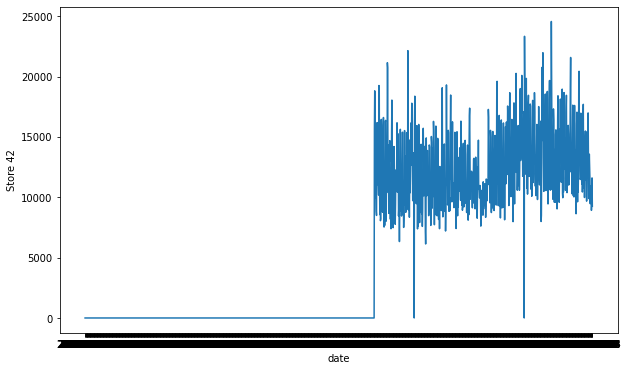

In [150]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="date", y="Store 42")

Podemos apreciar sucursales con muchos días registrados con ventas en 0, esto podría deberse a que la fecha de apertura es posterior a la fecha inicial que maneja el dataset.

Analizamos solo las sucursales que tienen menos de 6 días con valores de ventas en cero (0) en todo el periodo analizado:

In [151]:
cols = count_zeros[count_zeros < 6]
cols_lista = cols.index

In [152]:
df_filtered = df[cols_lista]
df_filtered['SUMA'] = df_filtered.sum(axis=1)
df_filtered.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


store_nbr,Store 34,Store 41,Store 44,Store 45,Store 46,Store 40,Store 47,Store 48,Store 39,Store 38,...,Store 15,Store 16,Store 19,Store 23,Store 26,Store 27,Store 2,Store 31,Store 54,SUMA
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000,0.000000,0.00000,0.000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000,0.000000,0.00000,0.000,0.000000,0.000000,0.00000,0.000,0.000000
2013-01-02,7749.693000,5205.833000,30095.181,27612.050950,27149.92000,4965.014,27263.111010,19700.000000,9956.37101,9198.507000,...,6577.80500,6242.572,5615.389008,6560.33700,5653.413,7207.547000,10266.718981,6637.56000,4973.285,434231.998948
2013-01-03,6246.722000,3699.117000,20447.057,17377.980970,15751.35500,4484.828,18340.205000,14350.784030,6986.44500,7860.617000,...,5691.44700,5316.415,3783.087000,4911.20401,3477.559,4387.566000,7612.540000,5437.82600,3901.570,312064.717106
2013-01-04,6100.120001,3581.132004,22795.799,19936.195040,17073.06408,3838.027,18982.008970,15276.803001,5605.49800,7433.773000,...,4825.64699,4616.990,3233.503000,5620.52800,3538.449,4586.466001,7526.377000,6107.63600,3266.966,307413.870095
2013-01-05,7189.406004,4694.560000,31382.508,27104.223034,27231.19803,5314.727,26996.263995,22876.474000,9256.67500,9842.551011,...,5694.05600,6014.655,6363.821023,6041.00200,5503.186,6731.607015,9539.566000,5875.18901,4394.549,419180.355196


Podemos observar que para todas las sucursales, las fechas en las que no tuvieron ventas corresponde al Primer día de cada año analizado:

In [153]:
df_filtered[df_filtered["SUMA"]==0]

store_nbr,Store 34,Store 41,Store 44,Store 45,Store 46,Store 40,Store 47,Store 48,Store 39,Store 38,...,Store 15,Store 16,Store 19,Store 23,Store 26,Store 27,Store 2,Store 31,Store 54,SUMA
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observamos las ventas totales por cada sucursal de nuestro Dataframe filtrado:

In [154]:
df_filtered.sum().sort_values(ascending = False).apply(lambda x: format(x, 'f'))

store_nbr
SUMA        873027605.300136
Store 44     62087553.250089
Store 45     54498010.416674
Store 47     50948310.061006
Store 3      50481910.185082
Store 49     43420095.783768
Store 46     41896062.121634
Store 48     35933130.273936
Store 51     32911489.537604
Store 8      30494286.928015
Store 50     28653020.624695
Store 11     28325558.481396
Store 7      26952049.582971
Store 9      26409441.064794
Store 6      25183679.997054
Store 2      21557388.644564
Store 39     20252192.533540
Store 37     19970635.614478
Store 27     19188021.381534
Store 4      18909700.380001
Store 38     18859999.260530
Store 40     18395757.405968
Store 28     18383154.833926
Store 31     17746872.701507
Store 34     17090734.159150
Store 5      15592404.572353
Store 41     14991039.138584
Store 33     14178501.293449
Store 19     13049509.836733
Store 23     11651380.674909
Store 15     11451270.022648
Store 54     11057483.117905
Store 16     10986412.554749
Store 13     10523045.817940
Stor

Seleccionamos 5 sucursales tomando una muestra aleatoria de las que tienen "Sales" igual a cero en menos de 6 días del total analizado:

In [200]:
#cols = count_zeros[count_zeros < 6].sample(5, replace = False).index
cols = ['Store 13', 'Store 23', 'Store 5', 'Store 7', 'Store 51']
df_stores = df[cols]
df_stores


store_nbr,Store 13,Store 23,Store 5,Store 7,Store 51
date,,,,,
2013-01-01,0.000000,0.00000,0.000000,0.000000,0.000000
2013-01-02,5516.831000,6560.33700,10598.619020,11997.502000,15134.490990
2013-01-03,4852.438995,4911.20401,7770.968000,9277.958000,11170.057015
2013-01-04,4249.484000,5620.52800,7347.641991,8096.573018,12452.326000
2013-01-05,6465.232000,6041.00200,8192.598000,8610.605999,15046.247000
...,...,...,...,...,...
2017-08-11,6217.257000,7046.12400,9510.871000,15090.052970,26070.018000
2017-08-12,7541.866000,6180.08500,8157.070000,14668.772022,19532.964000
2017-08-13,5077.408995,7733.60000,10044.821000,14871.927000,25713.284030


Tranformación Dataframe:

Realizamos una transformación en el dataframe, pasando los nombres de columna a un atributo más, identificándose en cada fila. También agregamos como nueva información columnas para año, mes, día de la semana y día del mes, que luego nos permitirán agrupar por cada uno de estos criterios.

In [156]:
#TRANSFORMACION DE DATA FRAME
df_storesreset=df_stores.reset_index()
df_storesreset
df_transf = df_storesreset.melt(id_vars='date', var_name='Stores', value_name='Sales')
df_transf['date']= pd.to_datetime(df_transf['date'], format="%Y/%m/%d")
df_transf['Year'] = df_transf['date'].dt.year
df_transf['Month'] = df_transf['date'].dt.month
df_transf['Year_month'] = df_transf.date.dt.strftime('%Y-%m')
df_transf['Weekday'] = df_transf.date.dt.strftime('%A')
df_transf['Day'] = df_transf['date'].dt.day

df_transf

,date,Stores,Sales,Year,Month,Year_month,Weekday,Day
0,2013-01-01,Store 13,0.000000,2013,1,2013-01,Tuesday,1
1,2013-01-02,Store 13,5516.831000,2013,1,2013-01,Wednesday,2
2,2013-01-03,Store 13,4852.438995,2013,1,2013-01,Thursday,3
3,2013-01-04,Store 13,4249.484000,2013,1,2013-01,Friday,4
4,2013-01-05,Store 13,6465.232000,2013,1,2013-01,Saturday,5
...,...,...,...,...,...,...,...,...
8415,2017-08-11,Store 51,26070.018000,2017,8,2017-08,Friday,11
8416,2017-08-12,Store 51,19532.964000,2017,8,2017-08,Saturday,12
8417,2017-08-13,Store 51,25713.284030,2017,8,2017-08,Sunday,13
8418,2017-08-14,Store 51,18932.967000,2017,8,2017-08,Monday,14


In [157]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8420 entries, 0 to 8419
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        8420 non-null   datetime64[ns]
 1   Stores      8420 non-null   object        
 2   Sales       8420 non-null   float64       
 3   Year        8420 non-null   int64         
 4   Month       8420 non-null   int64         
 5   Year_month  8420 non-null   object        
 6   Weekday     8420 non-null   object        
 7   Day         8420 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 526.4+ KB


Realizamos la misma transformación para todas las sucursales

In [158]:
df_ALL=df_filtered.reset_index()
df_ALL
df_transfTOTAL = df_ALL.melt(id_vars='date', var_name='Stores', value_name='Sales')
indexNames = df_transfTOTAL[ df_transfTOTAL['Stores'] == 'SUMA' ].index
df_transfTOTAL.drop(indexNames)
df_transfTOTAL['date']= pd.to_datetime(df_transfTOTAL['date'], format="%Y/%m/%d")
df_transfTOTAL['Year'] = df_transfTOTAL['date'].dt.year
df_transfTOTAL['Month'] = df_transfTOTAL['date'].dt.month
df_transfTOTAL['Year_month'] = df_transfTOTAL.date.dt.strftime('%Y-%m')
df_transfTOTAL['Weekday'] = df_transfTOTAL.date.dt.strftime('%A')
df_transfTOTAL['Day'] = df_transfTOTAL['date'].dt.day

df_transfTOTAL.head(3)


,date,Stores,Sales,Year,Month,Year_month,Weekday,Day
0,2013-01-01,Store 34,0.000,2013,1,2013-01,Tuesday,1
1,2013-01-02,Store 34,7749.693,2013,1,2013-01,Wednesday,2
2,2013-01-03,Store 34,6246.722,2013,1,2013-01,Thursday,3


###Analizar las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza, coeficiente de variación, coeficientes de asimetría y kurtosis).

A partir de la muestra de las 5 sucursales, generamos un gráfico de barras donde visualizamos las ventas promedio que presentaron las mismas.

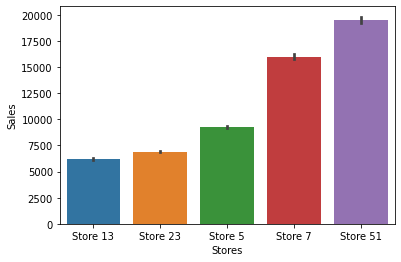

In [159]:
sns.barplot(x='Stores', y='Sales', data = df_transf)

Calculamos las ventas totales de cada sucursal de nuestra muestra:

Podemos observar que nuestra muestra aleatoria incluye sucursales cuyo volumen de ventas totales son difieren significativamente entre sí.

In [160]:

df_stores.sum().apply(lambda x: format(x, '.2f')).sort_values(ascending = False)

store_nbr
Store 51    32911489.54
Store 7     26952049.58
Store 5     15592404.57
Store 23    11651380.67
Store 13    10523045.82
dtype: object

Calculamos las medidas de estadística descriptiva, donde podemos corroborar la disparidad de los medidas entre las sucursales.

In [161]:
df_stores.describe().round()

store_nbr,Store 13,Store 23,Store 5,Store 7,Store 51
count,1684.0,1684.0,1684.0,1684.0,1684.0
mean,6249.0,6919.0,9259.0,16005.0,19544.0
std,2026.0,1801.0,2518.0,5718.0,6440.0
min,0.0,0.0,0.0,0.0,0.0
25%,4775.0,5405.0,7478.0,10402.0,14176.0
50%,5984.0,7026.0,9139.0,17232.0,19185.0
75%,7333.0,8095.0,10660.0,20505.0,24472.0
max,16745.0,14079.0,22556.0,36744.0,41745.0


**Boxplot respecto a las ventas de cada SUCURSAL**

A través de el gráfico boxenplot podemos visualizar la distribución de las ventas y la presencia de valores atípicos.

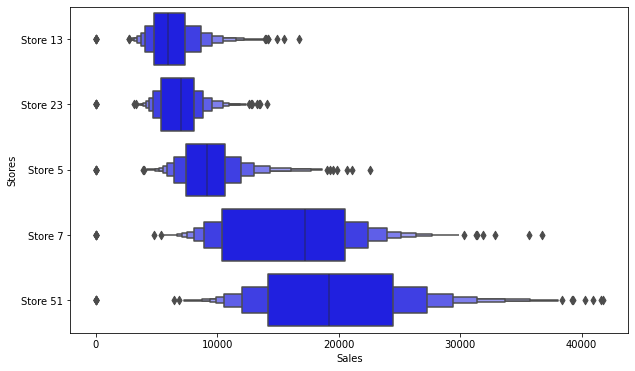

In [162]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_transf, x='Sales', y='Stores',
                color='blue')
plt.ticklabel_format(style='plain', axis='x')

Histograma de frecuencias de ventas totales: a través de este grafico, también podemos visualizar la distribución de las ventas y la presencia de valores atípicos, pero a un nivel agregado de las mismas.

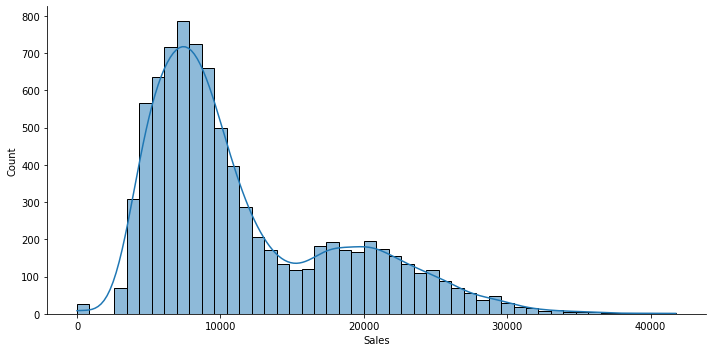

In [163]:

sns.displot(df_transf['Sales'], aspect=2, kde=True)


Para analizar la muestra de modo comparativo con el subconjunto de las sucursales que han registrado ventas desde 01/01/2013, mostramos el histograma de frecuencias de las ventas de este último subconjunto de sucursales. Podemos observar que presentan distribuciones similares, sólo que en este caso la presencia de valores atípicos más importantes. 

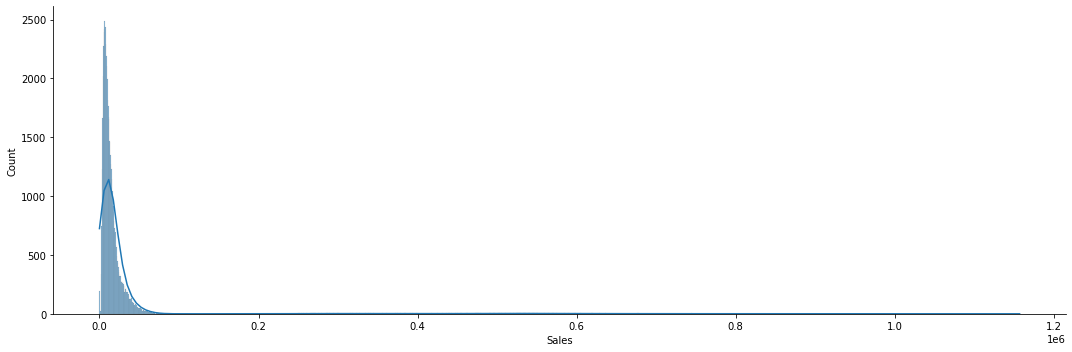

In [164]:
sns.displot(df_transfTOTAL['Sales'], aspect=3, kde=True)

Histograma de frecuencias de ventas totales por sucursal de la muestra: a través de este grafico, también podemos visualizar la distribución de las ventas y la presencia de valores atípicos. Se puede observar que existe un pico de ventas alrededor del valor 10000 en todas las sucursales. Además, se observa que las 'Store 7' y 'Store 51', presentan otro pico de ventas alrededor del valor 20000. 

<Figure size 1800x4320 with 0 Axes>

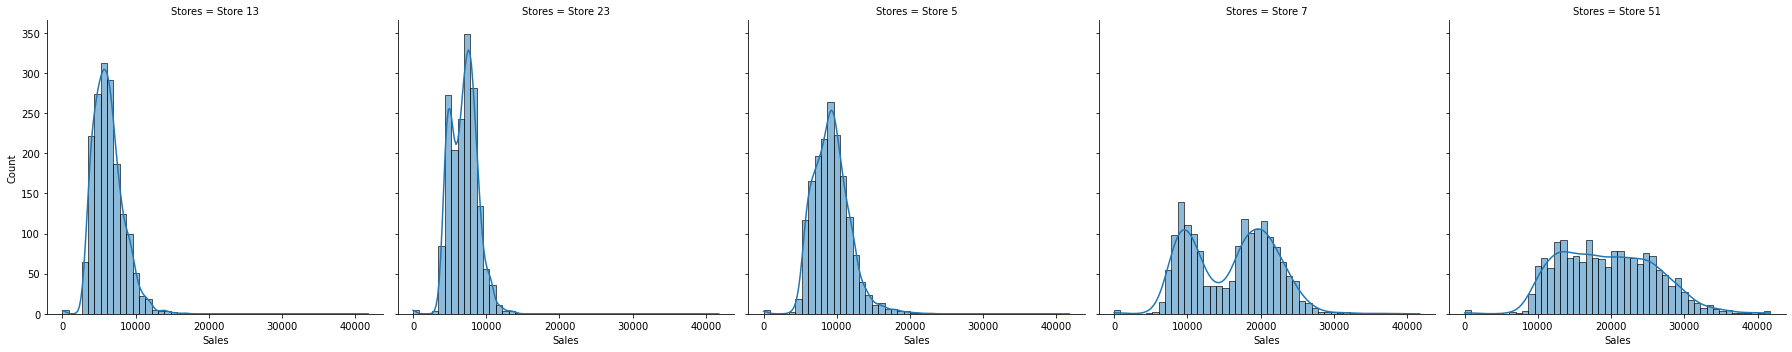

In [165]:
plt.figure(figsize=(25,60))
#sns.displot(data=df_transf, x="Sales", col="Stores", kind="kde")
sns.displot(data=df_transf, x="Sales", col="Stores", kde=True)

El siguiente gráfico nos permite visualizar las 5 sucursales de forma comparativa.

<Figure size 1800x3600 with 0 Axes>

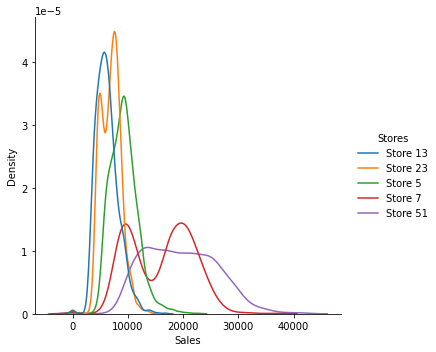

In [166]:
plt.figure(figsize=(25,50))
sns.displot(data=df_transf, x="Sales", hue="Stores", kind="kde")

**QQ PLOT:**
*Es* una herramienta del analisis de datos que se utiliza para explicar si un conjunto de datos se distribuye de cierta manera a menos que se especifique lo contrario la grafica muestra si se ajustan a una distribución normal. En el eje Y estan los valores que toman las variables desde el min al max, y en el eje x los quantiles teoricos. Los quantiles teoricos miden a cuantas desviaciones standar de la media están los valores. Cuan alejados de la media están La linea roja indica el comportamiento que deberian seguir los puntos de datos (azules) si tuvieran una distribución normal, lo cual no se presenta.

Sin embargo, esto es esperable dado que los datos de series de tiempo no tienen distribución normal.

QQPLOT - STORE 23

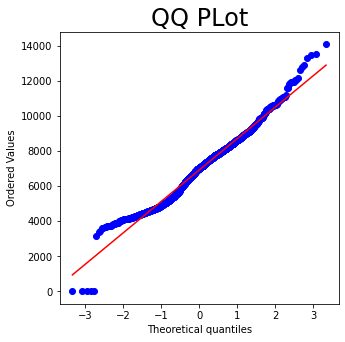

In [167]:
fig, ax = plt.subplots(figsize=(5,5), sharey='row')
scipy.stats.probplot(df_stores['Store 23'], plot = plt)
plt.title('QQ PLot', size = 24)
plt.show()


QQPLOT - STORE 13

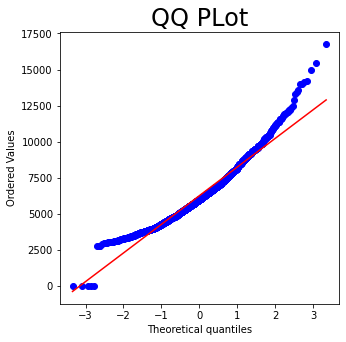

In [168]:
fig, ax = plt.subplots(figsize=(5,5), sharey='row')
scipy.stats.probplot(df_stores['Store 13'], plot = plt)
plt.title('QQ PLot', size = 24)
plt.show()

QQPLOT - STORE 5

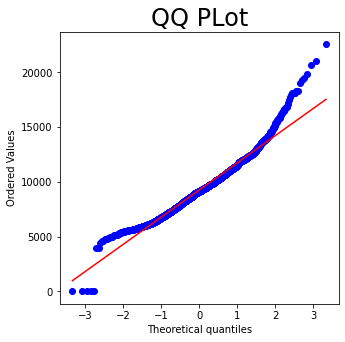

In [169]:
fig, ax = plt.subplots(figsize=(5,5), sharey='row')
scipy.stats.probplot(df_stores['Store 5'], plot = plt)
plt.title('QQ PLot', size = 24)
plt.show()

QQPLOT - STORE 7

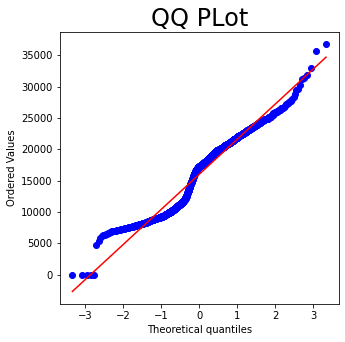

In [170]:
fig, ax = plt.subplots(figsize=(5,5), sharey='row')
scipy.stats.probplot(df_stores['Store 7'], plot = plt)
plt.title('QQ PLot', size = 24)
plt.show()

QQPLOT - STORE 51

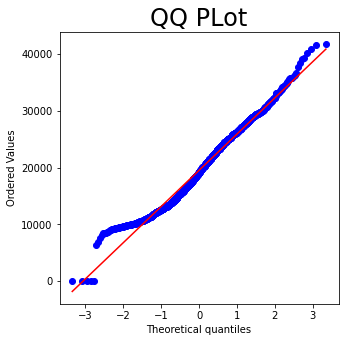

In [171]:
fig, ax = plt.subplots(figsize=(5,5), sharey='row')
scipy.stats.probplot(df_stores['Store 51'], plot = plt)
plt.title('QQ PLot', size = 24)
plt.show()

###Estacionalidad

Los siguientes gráficos boxplot representan las ventas totales de todas las sucursales de nuestra muestra, desagregadas por mes para todo el periodo analizado. Se observa que existe un pico de ventas para el mes de junio y que se incrementan las ventas desde septiembre a diciembre.



Observaciones para cada año: 2013: Se presenta un pico de ventas en el mes de diciembre y el mes mas bajo en ventas es febrero. 2014: Se observa una fuerte caida en las ventas para los meses de febrero, abril, mayo y junio. El pico de ventas se produce en diciembre. 2015: Desde enero a mayo se registran periodos con bajas ventas, que se arrastra probablemente del comportamiento observado en 2014. A partir de junio los niveles de ventas se recuperan. 2016: Aunque se aprecian algunos picos, como el habitual de diciemrbe, este año tiene una estabilidad y resultan mas parejas de mes a mes.

Ventas de todas las sucursales de la muestra agrupadas por mes:

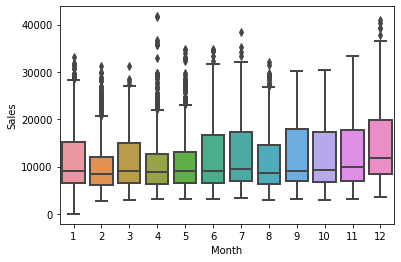

In [172]:
sns.boxplot(x="Month", 
            y="Sales", 
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf,
            linewidth=2)

Ventas de todas las sucursales de la muestra agrupadas por mes ara el año 2013:

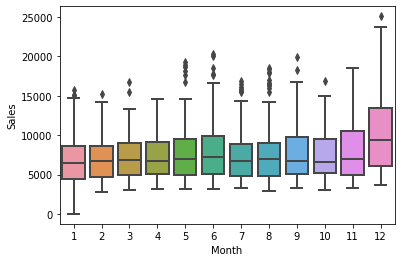

In [173]:
sns.boxplot(x="Month", 
            y="Sales", 
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf[df_transf["Year"]==2013],
            linewidth=2)

Ventas de todas las sucursales de la muestra agrupadas por mes ara el año 2014:

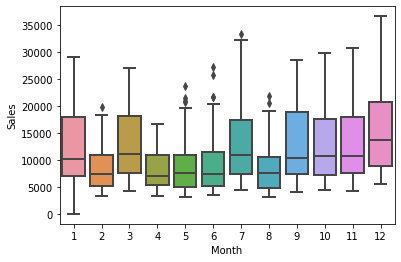

In [174]:
sns.boxplot(x="Month", 
            y="Sales", 
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf[df_transf["Year"]==2014],
            linewidth=2)

Ventas de todas las sucursales de la muestra agrupadas por mes ara el año 2015:

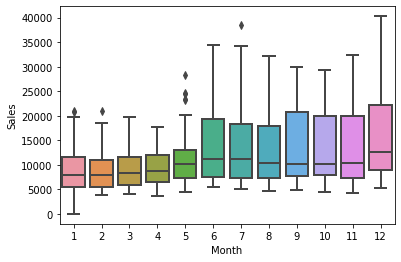

In [175]:
sns.boxplot(x="Month", 
            y="Sales", 
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf[df_transf["Year"]==2015],
            linewidth=2)

Ventas de todas las sucursales de la muestra agrupadas por mes ara el año 2016:

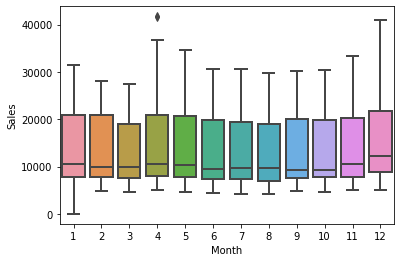

In [176]:
sns.boxplot(x="Month", 
            y="Sales", 
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf[df_transf["Year"]==2016],
            linewidth=2)

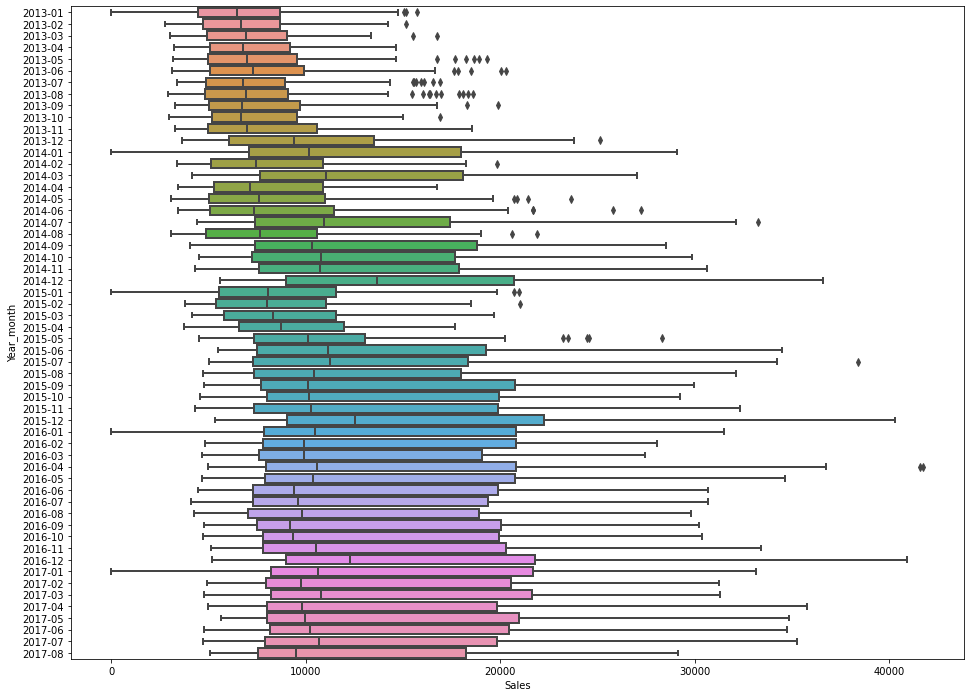

In [177]:
fig = plt.figure(figsize=(16,12))
sns.boxplot(x="Sales", 
            y="Year_month", 
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf,
            linewidth=2)

Ventas de todas las sucursales de la muestra agrupadas por dia de la semana.


Se observa para todo el periodo considerado en forma agregada como es esperable que los dias sabados y domingos son dias de mayores ventas. Los dias miercóles presentan a su vez, un pico de ventas que podría deberse a promociones o descuentos.

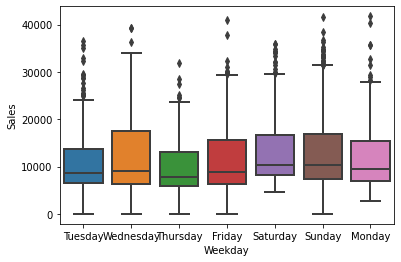

In [178]:
sns.boxplot(x="Weekday", 
            y="Sales",
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf, 
            linewidth=2)

Explorando los datos sobre promociones, confirmamos que los días miércoles son los días que mas productos poseen promociones de ventas (ver la siguiente tabla).

In [179]:
df_full2 = df_full.copy()
df_full2["date"] = pd.to_datetime(df_full2["date"])
df_full2['Weekday'] = df_full2.date.dt.strftime('%A')
df_full2 = df_full2[["onpromotion", "Weekday"]]
df_full2.groupby(["Weekday"]).sum().sort_values(by='onpromotion', ascending=False)

,onpromotion
Weekday,
Wednesday,1766767
Friday,1598481
Tuesday,1065643
Sunday,906639
Thursday,868989
Saturday,834192
Monday,769911


Ventas de todas las sucursales de la muestra agrupadas por dia del mes:

Se puede apreciar mediante el gráfico que los días 15, 16, 31 y 1 se presentan picos de ventas. Esto podria corresponderse con las fechas de pago de haberes a empleados del sector público.

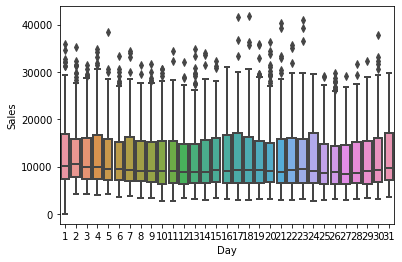

In [180]:
sns.boxplot(x="Day", 
            y="Sales",
            #hue="Stores", #Descomentar para diferenciar por store
            data=df_transf, 
            linewidth=2)

###¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos? (Tener en cuenta las características de la estacionalidad)


Realizamos un gráfico de dispersión para ver comportamiento de las ventas totales y los outliers. Se observa que el primer día de cada año las ventas son igual a cero, como asi también la existencia de picos de ventas para fines de cada año. Del conocimiento de dominio, sabemos que se trata del comportamiento tipico esperado del rubro y no estariamos en este caso ante la presencia de oultiers. Al respecto, en esta instancia del análisis no avanzaremos con tratamiento de los mismos.

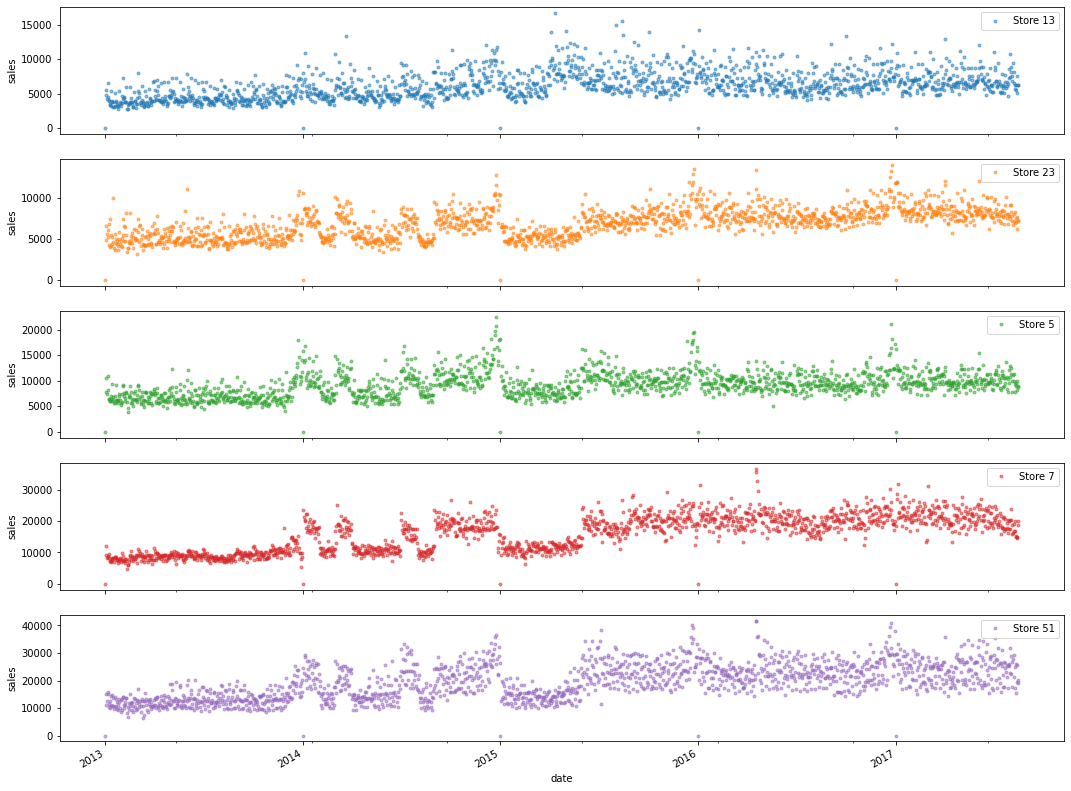

In [215]:
df_stores.index = pd.to_datetime(df_stores.index)
axes = df_stores[cols].plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

###Explorar la existencia de estacionalidad.
Agrupar por año / mes / semana

In [182]:
df_storesreset=df_stores.reset_index()
df_storesreset
df_storesreset['date']= pd.to_datetime(df_transf['date'], format="%Y/%m/%d")
df_storesreset['Year'] = df_transf['date'].dt.year
df_storesreset['Month'] = df_transf['date'].dt.month
df_storesreset['Day'] = df_transf['date'].dt.day
df_storesreset.head()

store_nbr,date,Store 13,Store 23,Store 5,Store 7,Store 51,Year,Month,Day
0,2013-01-01,0.000000,0.00000,0.000000,0.000000,0.000000,2013,1,1
1,2013-01-02,5516.831000,6560.33700,10598.619020,11997.502000,15134.490990,2013,1,2
2,2013-01-03,4852.438995,4911.20401,7770.968000,9277.958000,11170.057015,2013,1,3
3,2013-01-04,4249.484000,5620.52800,7347.641991,8096.573018,12452.326000,2013,1,4
4,2013-01-05,6465.232000,6041.00200,8192.598000,8610.605999,15046.247000,2013,1,5


In [184]:
from statsmodels.tsa.stattools import adfuller
#from datetime import datetime

In [185]:
#aux=pd.to_datetime(df_transfTOTAL['date'], format="%&Y-%w")
#aux
#df_transfTOTAL['date'].isoweekday()
#df_transfTOTAL['date']= pd.to_datetime(df_transfTOTAL['date'], format="%Y/%m/%d")

#aux=datetime.date(df_transfTOTAL['date'].Year,df_transfTOTAL['date'].Month,df_transfTOTAL['date'].Day)

#aux.isocalendar()
#df_Anio=df_transfTOTAL.groupby({'Year','Month'}).agg('sum')
#df_Anio

In [186]:
#adf=adfuller(df_stores_anio)
#adf

Análisis de Estacionalidad de la Serie temporal (Por Día)

In [187]:
#adf=adfuller(df_stores,maxlag=1)
#adf

Vamos a Analizar cada uno de los datos obtenidos de la prueba de Dickey–Fuller.

-Primer punto de datos: -12.250481572429598: valor crítico de los datos. -Segundo punto de datos: 9.565648431312974e-23: Probabilidad de que la hipótesis nula no sea rechazada (valor p) -Tercer punto de datos: 1: número de retrasos utilizados en la regresión para determinar la estadística t. Por lo tanto, aquí hay correlaciones automáticas que vuelvan a los períodos '1'. -Cuarto dato: 1677: Número de observaciones utilizadas en el análisis. -Quinto punto de datos: {'1%': -3.4342553892578462, '10%': -2.5676883512313102, '5%': -2.8632650083386295}: valores T correspondientes a la prueba de Adfuller.

Dado que el valor crítico -12,25<-3,4, -2,5, -2,8 (valores t con intervalos de confianza del 1 %, 5 % y 10 %), se puede rechazar la hipótesis nula. Entonces hay ESTACIONALIEDAD en sus datos.

###Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse?



In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [194]:
#df_stores_ix=df_stores[df_stores==0].index
#df_stores_ix
#df_stores=df_stores.drop(df_stores_ix)

In [196]:
df_stores.index=pd.to_datetime(df_stores.index)

In [201]:
df_stores

store_nbr,Store 13,Store 23,Store 5,Store 7,Store 51
date,,,,,
2013-01-01,0.000000,0.00000,0.000000,0.000000,0.000000
2013-01-02,5516.831000,6560.33700,10598.619020,11997.502000,15134.490990
2013-01-03,4852.438995,4911.20401,7770.968000,9277.958000,11170.057015
2013-01-04,4249.484000,5620.52800,7347.641991,8096.573018,12452.326000
2013-01-05,6465.232000,6041.00200,8192.598000,8610.605999,15046.247000
...,...,...,...,...,...
2017-08-11,6217.257000,7046.12400,9510.871000,15090.052970,26070.018000
2017-08-12,7541.866000,6180.08500,8157.070000,14668.772022,19532.964000
2017-08-13,5077.408995,7733.60000,10044.821000,14871.927000,25713.284030


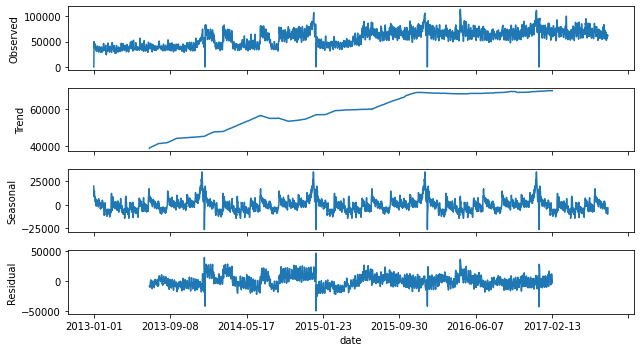

In [211]:
#df_stores
#df_stores.plot()
#plt.show()

model = seasonal_decompose(df_stores['Store 51']+df_stores['Store 13']+df_stores['Store 23']+df_stores['Store 5']+df_stores['Store 7'],model="additive",freq=365)
fig = model.plot()
matplotlib.rcParams['figure.figsize'] = [10.0,6.0]

###¿Las series tienden a moverse en forma conjunta? ¿Siempre se da dicho patrón?



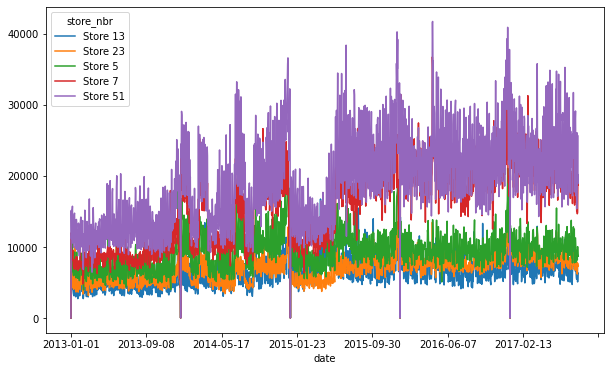

In [212]:
df_stores.plot()
plt.show()

In [228]:
stores.plot()
plt.show()

NameError: ignored

###Seleccionar una serie y confeccionar un diagrama de dispersión entre la misma y su valor retardado un período. Repetir el mismo procedimiento entre la serie y sus valores retardados 2, 3 y 4 períodos.


Del analisis de los gráficos segun dias de retardo, podemos observar que a medida que incrementamos en un período más, la dispersión respecto de la línea media (0), se acentúa cada vez más. Esta conclusión va de la mano con lo que veremos más adelante respecto de las funciones de autocorrelación.

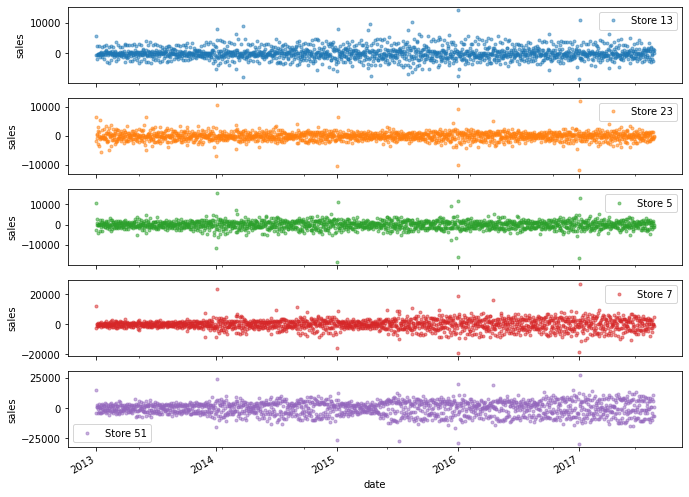

In [213]:
df_stores.index = pd.to_datetime(df_stores.index)
#RETARDO DE 1 PERÍODO
axes = df_stores[cols].diff(1).plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

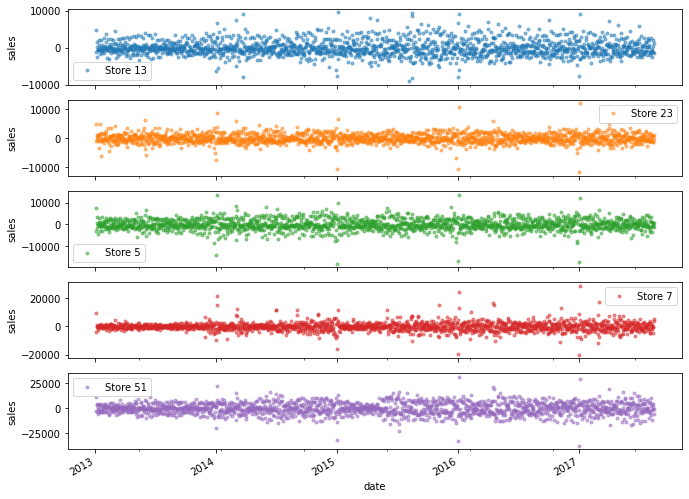

In [214]:
#RETARDO DE 2 PERÍODOS
axes = df_stores[cols].diff(2).plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

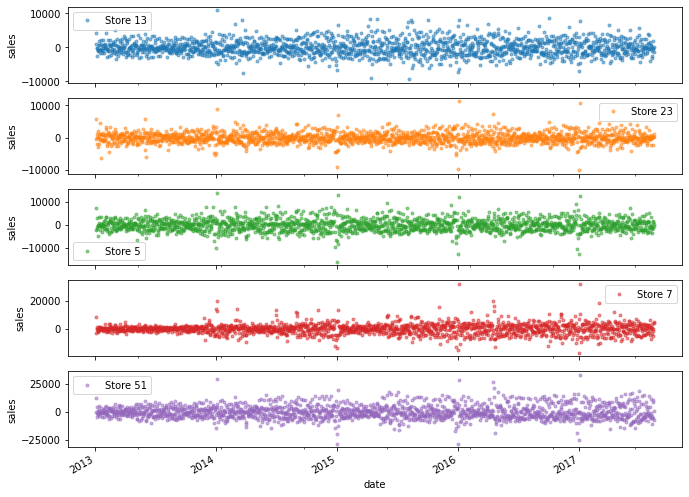

In [225]:
#RETARDO DE 3 PERÍODOS
axes = df_stores[cols].diff(3).plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

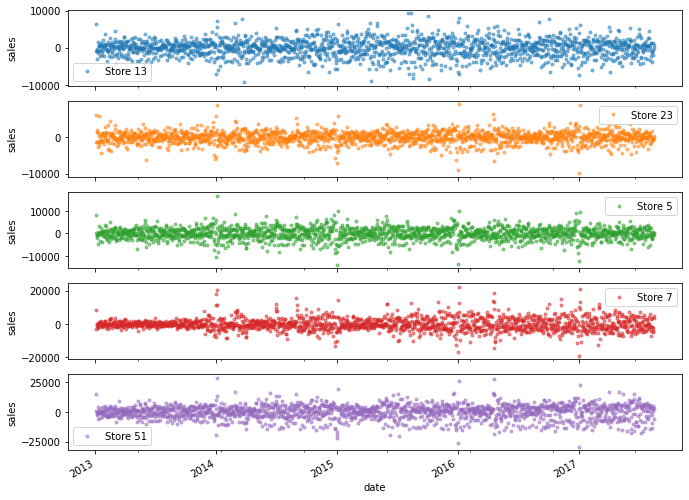

In [226]:
#RETARDO DE 4 PERÍODOS
axes = df_stores[cols].diff(4).plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

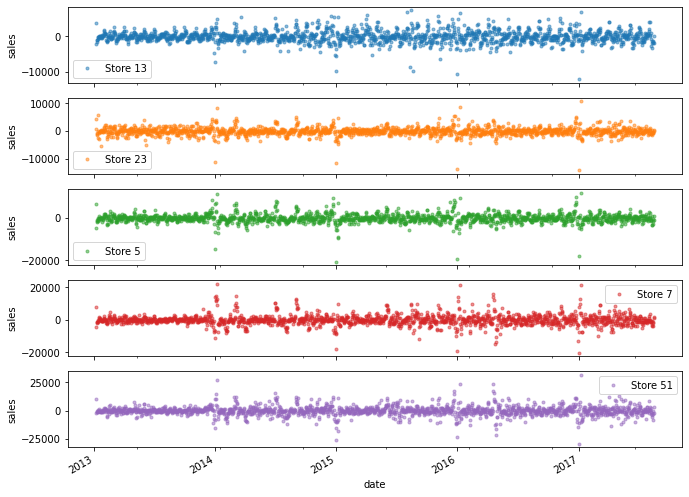

In [234]:
#RETARDO DE 7 PERÍODOS
axes = df_stores[cols].diff(7).plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

###Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente link puede ser útil para una primera aproximación.

Autocorrelación es una cuantificación del grado de asociatividad de variables continuas. En este caso la autocorrelacion se analiza en que medidad un valor en un tiempo t depende del valor anterior en un tiempo t-1.

In [221]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

A continuación calcularemos la función ACF que permite calcular la autocorrelación simple. La misma expone como ordenada el coeficiente de correlación e indica hasta que punto la variable depende de sí misma.

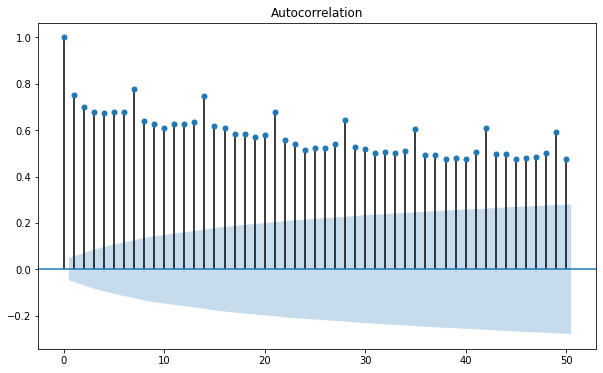

In [222]:
df_acf = df_stores['Store 51']+df_stores['Store 13']+df_stores['Store 23']+df_stores['Store 5']+df_stores['Store 7']
#+stores['Store 50']+stores['Store 26']+stores['Store 49']+stores['Store 8']+stores['Store 39'] 
#['Store 51']
#df['Store 51']+df['Store 13']+df['Store 23']+df['Store 5']+df['Store 7']+df['Store 50']+df['Store 26']+df['Store 49']+df['Store 8']+df['Store 39']
#df_acf = df.index <= '2015-12-31' #& df.index >= '2015-01-01'
acf=plot_acf(df_acf, lags=50)

Puede observarse en la gráfica que los valores son próximos a 1 donde implica que hay una dependencia fuerte respecto al valor anterior.

Autocorrelación Parcial es una parte de la dependencia que indica el coeficiente de autocorrelación simple sea indirecta, a traves de los valores intermedios, por lo que solamente los valores más próximos al actual deberían ser considerados.

Ahora construiremos la función PACF permite calcular un coeficiente de autocorrelación que es mas adecuado para analizar las dependencias, ya que al eliminar la influencia de las restantes variables (valores intermedios) aisla el efecto propio de cada retardo sobre el valor actual de la serie, lo que permite estudiar el efecto de la variable en la serie sin efectos indirectos.

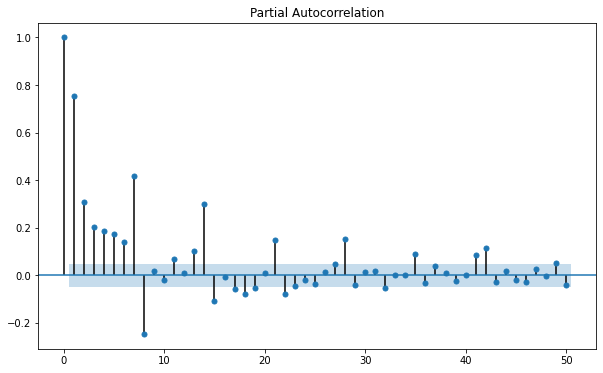

In [223]:
df_pacf = df_stores['Store 51']+df_stores['Store 13']+df_stores['Store 23']+df_stores['Store 5']+df_stores['Store 7']
#+df_stores['Store 50']+df_stores['Store 26']+df_stores['Store 49']+df_stores['Store 8']+df_stores['Store 39']
#df_pacf = stores['Store 51']
#df_pacf = df.index <= '2015-12-31' #& df.index >= '2015-01-01'
pacf=plot_pacf(df_acf, lags=50)

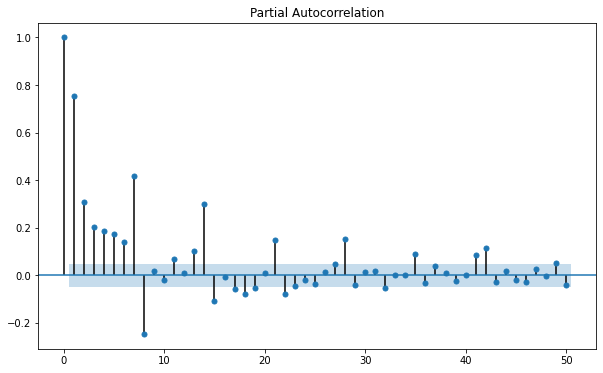

In [224]:
#df['Store 51']+df['Store 13']+df['Store 23']+df['Store 5']+df['Store 7']+df['Store 50']+df['Store 26']+df['Store 49']+df['Store 8']+df['Store 39']
df_pacf = df_stores['Store 51']
#df_pacf = df.index <= '2015-12-31' #& df.index >= '2015-01-01'
pacf=plot_pacf(df_acf, lags=50)